In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프에 대한 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False

### 데이터 읽어오기

In [2]:
# 구분자 탭으로 되어 있으므로 구분자를 지정한다.
chipo = pd.read_csv('data/chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [3]:
# 데이터 프레임의 정보
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [4]:
# 결측치 확인
chipo.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [5]:
# 컬럼명 확인
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
# 인덱스 확인
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### 범위형 데이터에 대한 이상치 확인

In [7]:
# 범위형 데이터에 대한 요약 통계 정보를 구한다.
# item_price가 나오지 않았다는 것은 문자열에 해당한다는 의미이다.
chipo[['order_id', 'quantity', 'item_price']].describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [8]:
# item_price 확인
chipo['item_price'].dtype

dtype('O')

In [9]:
# $를 제외하고 실수형으로 변환한다.
chipo['item_price2'] = chipo['item_price'].str[1:]
chipo['item_price2'] = chipo['item_price2'].astype('float64')
chipo['item_price2']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price2, Length: 4622, dtype: float64

In [10]:
# 다시 확인한다.
# min과 max를 통해 최소 최대를 확인하여 이상치 존재 여부를 확인한다.
chipo[['order_id', 'quantity', 'item_price2']].describe()

,order_id,quantity,item_price2
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [11]:
# 직접 통계량을 구해 확인한다.
chipo[['order_id', 'quantity', 'item_price2']].agg(['min', 'max'])

,order_id,quantity,item_price2
min,1,1,1.09
max,1834,15,44.25


### 카테고리형 데이터의 종류 확인

In [12]:
chipo['item_name'].value_counts().index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips',
       'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa',
       'Chicken Salad Bowl', 'Canned Soda', 'Side of Chips', 'Veggie Burrito',
       'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl', 'Barbacoa Bowl',
       'Carnitas Burrito', 'Steak Soft Tacos', '6 Pack Soft Drink',
       'Chips and Tomatillo Red Chili Salsa', 'Chicken Crispy Tacos',
       'Chips and Tomatillo Green Chili Salsa', 'Carnitas Soft Tacos',
       'Steak Crispy Tacos', 'Chips and Tomatillo-Green Chili Salsa',
       'Steak Salad Bowl', 'Nantucket Nectar', 'Barbacoa Soft Tacos',
       'Chips and Roasted Chili Corn Salsa', 'Izze',
       'Chips and Tomatillo-Red Chili Salsa', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa', 'Barbacoa Crispy Tacos',
       'Barbacoa Salad Bowl', 'Chicken Salad', 'Veggie Soft Tacos',
       'Carnitas Crispy Tac

In [13]:
# 컬럼내에서 중복을 제외하고 데이터를 가져온다.
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [14]:
# 중복을 제외한 데이터의 개수
len(chipo['item_name'].unique())

50

### 가장 많이 주문한 item 파악하기

In [15]:
# item 당 주문 횟수를 파악한다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count.sort_values(ascending=False)

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [16]:
# item 당 주문 총량을 구한다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity.sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


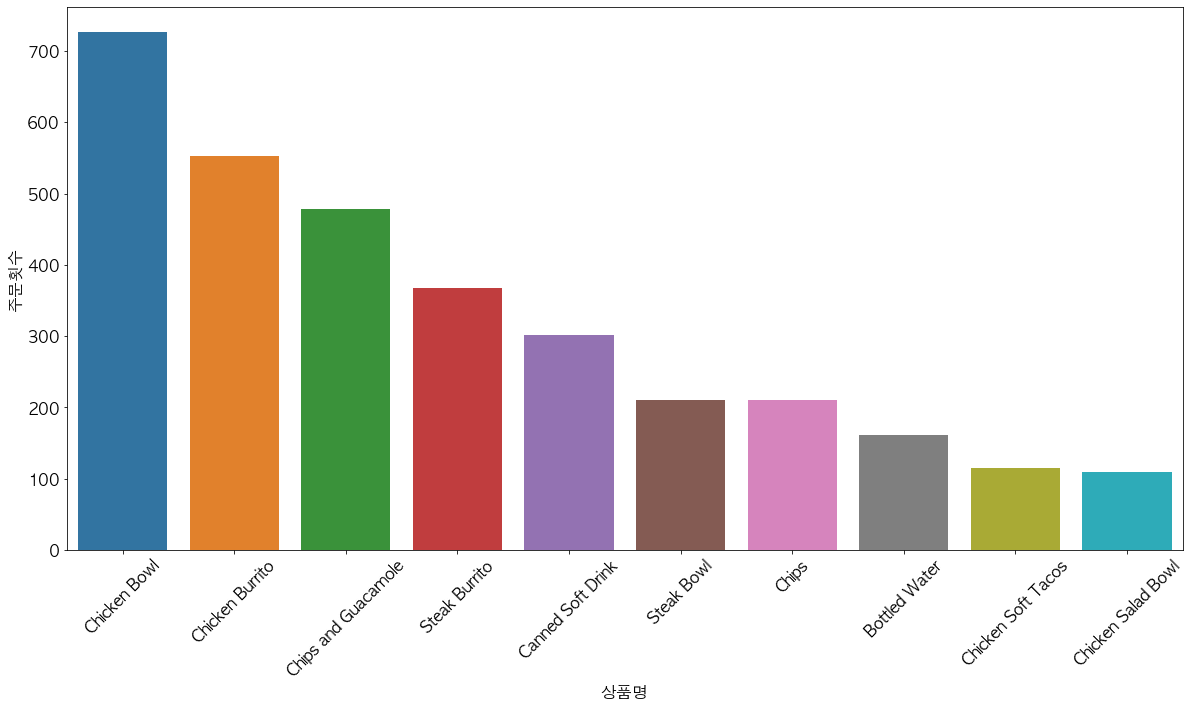

In [17]:
# 각 상품별 주문 횟수
order_count = order_count.sort_values(ascending=False)

# 시각화를 위해 데이터 프레임을 생성한다.
temp_df = pd.DataFrame(order_count)
# display(temp_df)

# 인덱스를 컬럼에 포함시킨다.
temp_df.reset_index(inplace=True)
# display(temp_df)

# 컬럼 이름을 변경한다.
temp_df.columns = ['상품명', '주문횟수']
# display(temp_df)

# 너무 많아서 상위 10개만 시각화한다.
sns.barplot(data=temp_df[:10], x='상품명', y='주문횟수')
plt.xticks(rotation=45)
plt.show()

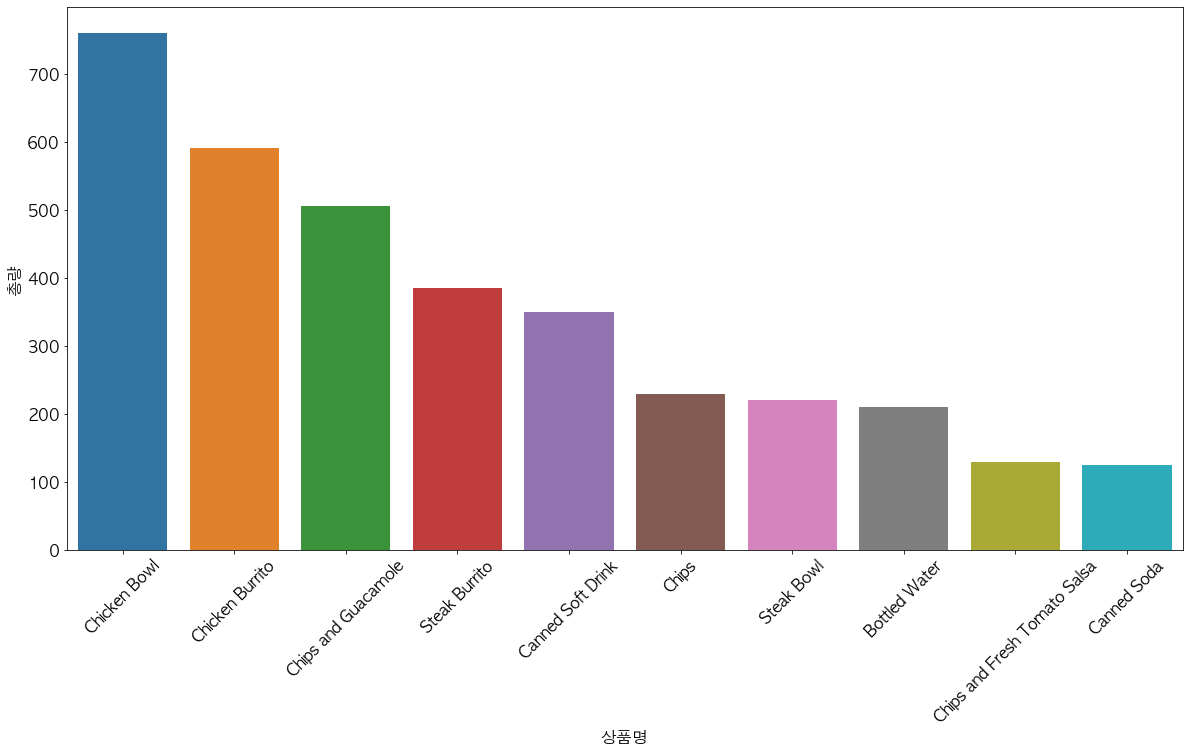

In [18]:
# 주문 총량 
item_quantity = item_quantity.sort_values(ascending=False)

# 데이터 프레임으로 생성한다.
temp_df = pd.DataFrame(item_quantity)

# 인덱스를 컬럼에 포함시킨다.
temp_df = temp_df.reset_index()

# 컬럼명을 변경한다.
temp_df.columns = ['상품명', '총량']

sns.barplot(data=temp_df[:10], x='상품명', y='총량')
plt.xticks(rotation=45)
plt.show()

### apply와 lambda 함수를 이용한 데이터 처리

In [19]:
# 각 행의 item_anme의 길이를 가져온다.
a1 = chipo['item_name'].apply(lambda x : len(x))
a1

0       28
1        4
2       16
3       37
4       12
        ..
4617    13
4618    13
4619    18
4620    18
4621    18
Name: item_name, Length: 4622, dtype: int64

### 문제
- 주문당 평균 계산 금액 출력
- 한 주문에 10달러 이상 사용한 주문의 id를 출력한다.
- 각 아이템의 가격 구하기(같은 아이템이지만 추가 주문이 있을 경우 가격이 올라간다. 이 때는 평균가를 결과로 한다.)
- 가장 비싼 주문에서 item이 몇개 팔렸는지..
- Vaggie Salad Bowl 이 몇번 주문 되었지(총량X, 주문 횟수)...
- Chiken Bowl을 2개 이상 주문한 주문 횟수 구하기

### 주문당 평균 계산 금액

In [20]:
# 같은 상품에 choice_description이 결측치인 것과 아닌 것에 대해 가격을 
# 확인한다.

# choice_description이 결측치인 행만 가져온다.
a1 = chipo['choice_description'].isna()
temp1 = chipo[a1]

# choice_description이 결측치가 아는 행만 가져온다.
a1 = chipo['choice_description'].notna()
temp2 = chipo[a1]

In [21]:
# temp1(choice_description이 결측치인 주문 데이터)에서 item_name을 추출한다.
a1 = temp1['item_name']
a2 = a1.values

# temp2(choice_description이 결측치가 아닌 주문데이터)에서 item_name이 a2에
# 있는 것만 가져온다.
a3 = temp2.query('item_name in @a2')
a3

# 주문옵션이 결측치인 상품과 그렇지 않은 상품이 중복되는 것은 존재하지 
# 않는다.
# 따라서 주문옵션이 결측치인 상품들 중에 quantity가 다른 상품의 
# 가격차이를 확인하면 된다.

,order_id,quantity,item_name,choice_description,item_price,item_price2


In [22]:
# 주문 옵션이 없는 상품들 중에 quantity가 다른 동일 상품의 가격을 확인한다.
a1 = temp1.query('quantity == 1 and item_name == "Chips"')
a2 = temp1.query('quantity == 2 and item_name == "Chips"')

display(a1.iloc[0])
display(a2.iloc[0]) 

order_id                  19
quantity                   1
item_name              Chips
choice_description       NaN
item_price            $2.15 
item_price2             2.15
Name: 40, dtype: object

order_id                  98
quantity                   2
item_name              Chips
choice_description       NaN
item_price            $4.30 
item_price2              4.3
Name: 223, dtype: object

- choice_description이 다르면 가격이 달라질 수는 있다. 그래서 평균을 구한다.
- 동일 상품이고 모든 조건이 같을 경우 경우 quantity 수에 따라 가격이 상승한다.
- 이에 price는 상품 단가가 아닌 주문 총액임을 알 수 있다.

In [23]:
# 주문당 평균을 구한다.
chipo.groupby('order_id')['item_price2'].mean()

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price2, Length: 1834, dtype: float64

### 한 주문에 10달러 이상 사용한 주문의 id를 출력한다.

In [24]:
# 1번 주문 데이터를 출력해본다.
chipo.query('order_id == 1')

,order_id,quantity,item_name,choice_description,item_price,item_price2
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39


In [25]:
# 한 주문에 대한 정보가 여러개 있을 수 있으므로 주문 번호를 기준으로
# 그룹을 묶고 가격 총합을 구한다
a1 = chipo.groupby('order_id')['item_price2'].sum()
a1

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price2, Length: 1834, dtype: float64

In [26]:
# 총 상품 금액이 10보다 큰 것만 가져온다.
a2 = a1[a1 > 10]
chipo.loc[a2.index]

,order_id,quantity,item_name,choice_description,item_price,item_price2
order_id,,,,,,
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98,10.98
...,...,...,...,...,...,...
1830,740,1,Chips,NaN,$2.15,2.15
1831,740,1,Canned Soft Drink,[Diet Coke],$1.25,1.25
1832,741,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Sour Cream,...",$21.96,21.96


### 각 아이템의 가격 구하기

In [27]:
# 같은 상품의 가격이 모두 같은지를 확인한다.
# 1개만 팔린 상품들의 정보를 가져온다.
chipo_one_item = chipo.query('quantity == 1')
chipo_one_item

,order_id,quantity,item_name,choice_description,item_price,item_price2
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98,10.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


In [28]:
# Chicken Salad Bowl 상품을 확인한다.
a1 = chipo_one_item.query('item_name == "Chicken Salad Bowl"')
a1['item_price'].value_counts()

$8.75      56
$11.25     41
Name: item_price, dtype: int64

choice_description에 따라 상품 가격이 달라지므로 각 상품별 평균 가격을 구한다.

In [29]:
# item_price를 quantity로 나눠 모든 상품에 대한 단가를 구한다.
chipo['item_price3'] = chipo['item_price2'] / chipo['quantity']

In [30]:
# 상품별 평균 단가를 구한다.
a1 = chipo.groupby('item_name')['item_price3'].mean()
a1

item_name
6 Pack Soft Drink                         6.490000
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.087273
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.431667
Bowl                                      7.400000
Burrito                                   7.400000
Canned Soda                               1.090000
Canned Soft Drink                         1.250000
Carnitas Bowl                            10.315588
Carnitas Burrito                          9.975932
Carnitas Crispy Tacos                     9.852857
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                              9.657727
Chicken Burrito                           9.475949
Chicken Crispy Tacos 

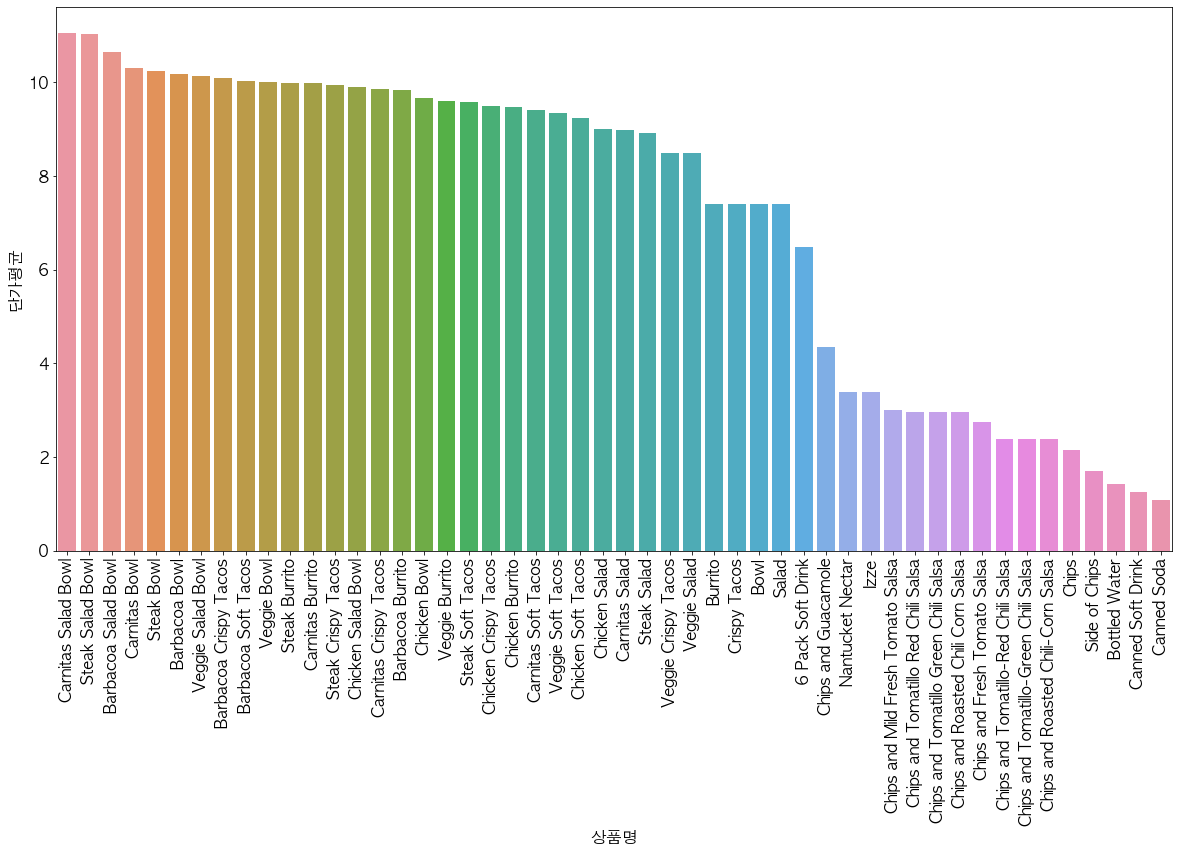

In [31]:
# 시각화
a1.sort_values(ascending=False, inplace=True)

temp_df = pd.DataFrame(a1)
temp_df.reset_index(inplace=True)
temp_df.columns = ['상품명', '단가평균']

sns.barplot(data=temp_df, x='상품명', y='단가평균')
plt.xticks(rotation=90)
plt.show()

### 가장 비싼 주문에서 item이 몇개 팔렸는지..

In [32]:
# 필요한 데이터를 가져온다.
a1 = chipo[['order_id', 'quantity', 'item_price2']]
a1

,order_id,quantity,item_price2
0,1,1,2.39
1,1,1,3.39
2,1,1,3.39
3,1,1,2.39
4,2,2,16.98
...,...,...,...
4617,1833,1,11.75
4618,1833,1,11.75
4619,1834,1,11.25
4620,1834,1,8.75


In [33]:
# 총합을 구한다.
a2 = a1.groupby('order_id').sum()
a2

,quantity,item_price2
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [34]:
# item_price2를 기준으로 내림차순 정렬한다.
a2.sort_values('item_price2', ascending=False, inplace=True)
a2.reset_index(inplace=True)
a2

,order_id,quantity,item_price2
0,926,23,205.25
1,1443,35,160.74
2,1483,14,139.00
3,691,11,118.25
4,1786,20,114.30
...,...,...,...
1829,17,2,10.08
1830,889,2,10.08
1831,1014,2,10.08
1832,1303,2,10.08


In [35]:
print(f'주문번호 : {a2.loc[0, "order_id"]}')
print(f'주문수량 : {a2.loc[0, "quantity"]}')
print(f'주문금액 : {a2.loc[0, "item_price2"]}')

주문번호 : 926
주문수량 : 23
주문금액 : 205.25


### Veggie Salad Bowl 이 몇번 주문 되었지(총량X, 주문 횟수)...

In [36]:
# 상품이름이 Veggie Salad Bowl인 것만 가져온다.
a1 = chipo.query('item_name == "Veggie Salad Bowl"')
a1

,order_id,quantity,item_name,choice_description,item_price,item_price2,item_price3
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25,11.25,11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$11.25,11.25,11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25,11.25,11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",$11.25,11.25,11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75,8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75,8.75,8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25,11.25,11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.25,11.25,11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",$8.75,8.75,8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75,8.75,8.75


In [37]:
len(a1)

18

### Chiken Bowl을 2개 이상 주문한 주문 횟수 구하기

In [38]:
# 검색한다.
a1 = chipo.query('item_name == "Chicken Bowl" and quantity >= 2')
a1

,order_id,quantity,item_name,choice_description,item_price,item_price2,item_price3
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,8.49
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$17.50,17.50,8.75
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$17.50,17.50,8.75
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",$32.94,32.94,10.98
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],$17.50,17.50,8.75
654,271,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$17.50,17.50,8.75
976,401,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$17.50,17.50,8.75
1017,418,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Black Beans]]",$17.50,17.50,8.75
1106,457,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$17.50,17.50,8.75
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",$22.50,22.50,11.25


In [39]:
len(a1)

33